In [23]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

In [24]:
with gzip.open("hists_reoptimize.pkl.gz") as fin:
    hists = pickle.load(fin)

In [25]:
with gzip.open("hists_reoptimize_sig.pkl.gz") as fin2:
    hists2 = pickle.load(fin2)

In [26]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "AK8Puppijet0_isHadronicV")
process_map = OrderedDict()
#process_map["QCD"] = ("QCD*", slice(None))
#process_map["QCDinV"] = ("Z*", 0)
process_map["Hcc"] = ("GluGluHToCC", 2)
process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zqq"] = ("ZJetsToQQ_HT*", 1)
process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
process_map["Top"] = ("TTTo*", slice(None))
process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    hists2[key] = hists2[key].group(process, process_cats, process_map)

/uscms/home/separk/nobackup/coffea/fnal-column-analysis-tools/fnal_column_analysis_tools/hist/hist_tools.py:478: RuntimeWarning: Allocating a large (>10M bin) histogram!
  warnings.warn("Allocating a large (>10M bin) histogram!", RuntimeWarning)


In [27]:
x = hists['hjetpt']
x2 = hists2['hjetpt']

In [28]:
print(x)
print(x2)

<Hist (process,AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho,AK8Puppijet0_deepdoubleb) instance at 0x7fd02e8a7dd8>
<Hist (process,AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho,AK8Puppijet0_deepdoubleb) instance at 0x7fd02ec235f8>


In [29]:
y = x.project("AK8Puppijet0_pt", slice(450,None), overflow='over')
y2 = x2.project("AK8Puppijet0_pt", slice(450,None), overflow='over')

In [30]:
print(y)
print(y2)

<Hist (process,AK8Puppijet0_N2sdb1,jetrho,AK8Puppijet0_deepdoubleb) instance at 0x7fd02e8a4780>
<Hist (process,AK8Puppijet0_N2sdb1,jetrho,AK8Puppijet0_deepdoubleb) instance at 0x7fd02e8a4978>


In [31]:
z = y.sum("jetrho")
z2 = y2.sum("jetrho")

In [32]:
print(z)
print(z2)

<Hist (process,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7fd02e8a45f8>
<Hist (process,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7fd02e8a4550>


In [33]:
print(z.sum("AK8Puppijet0_N2sdb1").values())
print(z2.sum("AK8Puppijet0_N2sdb1").values())

{('QCD',): array([3.4228500e+05, 1.6998853e+05, 8.3768609e+04, 5.0899090e+04,
       3.4842562e+04, 2.5458727e+04, 1.9737492e+04, 1.5889106e+04,
       1.3120262e+04, 1.1095387e+04, 9.5109697e+03, 8.3882676e+03,
       7.4811465e+03, 6.6900308e+03, 6.0560703e+03, 5.5225425e+03,
       5.1057188e+03, 4.8127920e+03, 4.4787036e+03, 4.2658105e+03,
       4.0768223e+03, 3.8814348e+03, 3.8003665e+03, 3.6455513e+03,
       3.6307871e+03, 3.6130911e+03, 3.5520081e+03, 3.5816829e+03,
       3.5929619e+03, 3.6987493e+03, 3.7275552e+03, 3.8998284e+03,
       4.0792646e+03, 4.2716445e+03, 4.3970098e+03, 4.0602231e+03,
       2.9825571e+03, 1.5690505e+03, 5.1539722e+02, 7.0690361e+01],
      dtype=float32)}
{('Hbb',): array([0.04442631, 0.07195245, 0.06914911, 0.06730691, 0.06455697,
       0.06463706, 0.06162014, 0.06348903, 0.06407639, 0.06442347,
       0.06423658, 0.06546471, 0.06762729, 0.07187236, 0.07350096,
       0.07803971, 0.08084305, 0.08554198, 0.09125546, 0.09857085,
       0.10564595

In [34]:
def multidim_cumsum(a):
    out = a[...,::-1].cumsum(1)[...,::-1]
    #for i in range(2,a.ndim+1):
    #    np.cumsum(out, axis=-i, out=out)
    return out

In [4]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [27]:
print(a)

[[ 7 -1  3]
 [ 1 -2  4]
 [10  1  5]]


In [145]:
multidim_cumsum(a)

array([[ 9,  2,  3],
       [ 3,  2,  4],
       [16,  6,  5]])

In [34]:
k = z.sum("AK8Puppijet0_N2sdb1").values()

In [35]:
print(k)

{('QCD',): array([3.4228500e+05, 1.6998853e+05, 8.3768609e+04, 5.0899090e+04,
       3.4842562e+04, 2.5458727e+04, 1.9737492e+04, 1.5889106e+04,
       1.3120262e+04, 1.1095387e+04, 9.5109697e+03, 8.3882676e+03,
       7.4811465e+03, 6.6900308e+03, 6.0560703e+03, 5.5225425e+03,
       5.1057188e+03, 4.8127920e+03, 4.4787036e+03, 4.2658105e+03,
       4.0768223e+03, 3.8814348e+03, 3.8003665e+03, 3.6455513e+03,
       3.6307871e+03, 3.6130911e+03, 3.5520081e+03, 3.5816829e+03,
       3.5929619e+03, 3.6987493e+03, 3.7275552e+03, 3.8998284e+03,
       4.0792646e+03, 4.2716445e+03, 4.3970098e+03, 4.0602231e+03,
       2.9825571e+03, 1.5690505e+03, 5.1539722e+02, 7.0690361e+01],
      dtype=float32)}


In [36]:
k[('QCD',)]

array([3.4228500e+05, 1.6998853e+05, 8.3768609e+04, 5.0899090e+04,
       3.4842562e+04, 2.5458727e+04, 1.9737492e+04, 1.5889106e+04,
       1.3120262e+04, 1.1095387e+04, 9.5109697e+03, 8.3882676e+03,
       7.4811465e+03, 6.6900308e+03, 6.0560703e+03, 5.5225425e+03,
       5.1057188e+03, 4.8127920e+03, 4.4787036e+03, 4.2658105e+03,
       4.0768223e+03, 3.8814348e+03, 3.8003665e+03, 3.6455513e+03,
       3.6307871e+03, 3.6130911e+03, 3.5520081e+03, 3.5816829e+03,
       3.5929619e+03, 3.6987493e+03, 3.7275552e+03, 3.8998284e+03,
       4.0792646e+03, 4.2716445e+03, 4.3970098e+03, 4.0602231e+03,
       2.9825571e+03, 1.5690505e+03, 5.1539722e+02, 7.0690361e+01],
      dtype=float32)

In [37]:
multidim_cumsum(k[('QCD',)])

AxisError: axis 1 is out of bounds for array of dimension 1

In [49]:
t = z.project("process").values(overflow='allnan')


In [50]:
t2 = z2.project("process").values(overflow='allnan')

In [51]:
print(t)

{(): array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01347783, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1526023 , 0.4287994 , ..., 0.07184455, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)}


In [53]:
multidim_cumsum(t[()])

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.515664  ,  2.515664  ,  2.515664  , ...,  0.        ,
         0.        ,  0.        ],
       [12.051075  , 12.051075  , 11.898473  , ...,  0.07184455,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [54]:
background = multidim_cumsum(t[()])

In [58]:
print(background)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 2.515664    2.515664    2.515664   ...  0.          0.
   0.        ]
 [12.051075   12.051075   11.898473   ...  0.07184455  0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [59]:
signal = multidim_cumsum(t2[()])

In [60]:
print(signal)

[[0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [8.009549e-05 8.009549e-05 8.009549e-05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]


In [22]:
print(a)

NameError: name 'a' is not defined

In [ ]:
aa = multidim_cumsum(a)

In [23]:
print(aa)

NameError: name 'aa' is not defined

In [24]:
print(np.sqrt(aa))

NameError: name 'aa' is not defined

In [61]:
sqrtbkg = np.sqrt(background)

In [62]:
print(sqrtbkg)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.5860845  1.5860845  1.5860845  ... 0.         0.         0.        ]
 [3.4714658  3.4714658  3.4494164  ... 0.26803833 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [27]:
print(aa)

NameError: name 'aa' is not defined

In [61]:
print(aa+1)

[[2 3 3]
 [3 5 6]
 [4 7 9]]


In [62]:
print((aa+1)/aa)

[[2.         1.5        1.5       ]
 [1.5        1.25       1.2       ]
 [1.33333333 1.16666667 1.125     ]]


In [63]:
soverb = signal/(sqrtbkg+1)

In [64]:
print(soverb)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.7912578e-05 1.7912578e-05 1.8001349e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [65]:
print(np.amax(aa))

8


In [66]:
print(np.amax(soverb))

0.02548592


In [67]:
print(np.argmax(aa))

8


In [68]:
print(aa.8)

SyntaxError: invalid syntax (<ipython-input-68-5256b4a29449>, line 1)

In [69]:
print(aa/8)

[[0.125 0.25  0.25 ]
 [0.25  0.5   0.625]
 [0.375 0.75  1.   ]]


In [70]:
print(aa/np.amax(aa))

[[0.125 0.25  0.25 ]
 [0.25  0.5   0.625]
 [0.375 0.75  1.   ]]


In [71]:
print(aa/np.argmax(aa))

[[0.125 0.25  0.25 ]
 [0.25  0.5   0.625]
 [0.375 0.75  1.   ]]


In [29]:
print(soverb/np.amax(soverb))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00030326 0.00030476 0.00030912 ... 0.00051443 0.00056548 0.        ]
 [0.00040841 0.00041573 0.00043079 ... 0.00108699 0.00034798 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [65]:
norm_soverb = soverb/np.amax(soverb)

In [66]:
print(norm_soverb)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00030327 0.00030327 0.00030477 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [67]:
print(np.argmax(soverb))

466


<IPython.core.display.Javascript object>


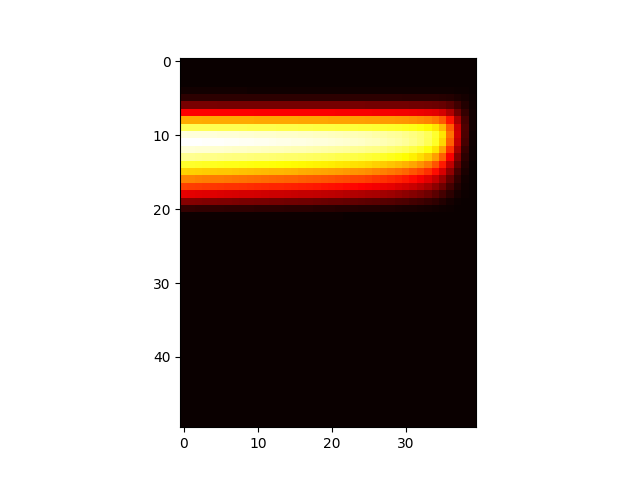

In [182]:
plt.imshow(signal, cmap='hot', interpolation='nearest')

In [1]:
print(np.amax(norm_soverb))

NameError: name 'np' is not defined

In [91]:
ptbins = np.searchsorted(norm_soverb[:,3], 1.0)

In [93]:
print(np.unravel_index(norm_soverb.argmax(), norm_soverb.shape))

(12, 39)


In [94]:
plt.imshow(sqrtbkg, cmap='hot', interpolation='nearest')

In [68]:
htemp = z.project("process")

In [69]:
htemp.clear()

In [70]:
htemp.label = '$S/\sqrt{B}$'

In [71]:
htemp._sumw = {():norm_soverb}

<IPython.core.display.Javascript object>


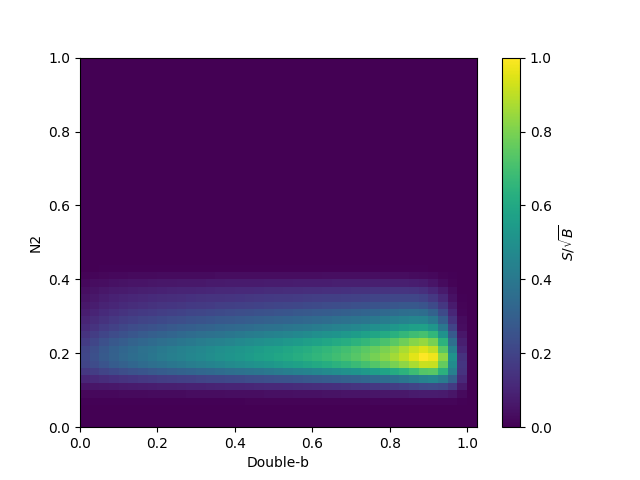

In [72]:
fig, ax, _ = plot.plot2d(htemp, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [73]:
fig.savefig("plots/reoptimize.pdf")


In [78]:
x.sum(process,"AK8Puppijet0_deepdoubleb")

<Hist (AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho) instance at 0x7f3df963d4a8>

In [35]:
x_QCD = x

In [36]:
x_Hbb = x2

In [37]:
print(x_QCD)

<Hist (process,AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho,AK8Puppijet0_deepdoubleb) instance at 0x7fd02e8a7dd8>


In [38]:
print(x_Hbb)

<Hist (process,AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho,AK8Puppijet0_deepdoubleb) instance at 0x7fd02ec235f8>


In [61]:
y_QCD = x_QCD.sum(process,"AK8Puppijet0_deepdoubleb")
y_HBB = x_Hbb.sum(process,"AK8Puppijet0_deepdoubleb")

In [62]:
print(y_QCD)
print(y_HBB)

<Hist (AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho) instance at 0x7fd02e8a7390>
<Hist (AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho) instance at 0x7fd02e8a75c0>


In [63]:
val_QCD = y_QCD.values(overflow='allnan')
val_HBB = y_HBB.values(overflow='allnan')

In [42]:
np.cumsum(val_QCD[()], axis=1)

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [8.30228188e+05, 8.86049461e+00, 5.29477406e+00, ...,
         0.00000000e+00, 0.00000000e+00, 8.29022408e+00],
        [8.70685062e+05, 1.80087166e+01, 1.39421892e+01, ...,
         5.71461737e-01, 2.85730863e+00, 8.29022408e+00],
        ...,
        [1.43737440e+07, 1.99104734e+05, 1.99758125e+05, ...,
         3.11592438e+05, 1.42756288e+06, 8.29022408e+00],
        [1.43737440e+07, 1.99104734e+05, 1.99758125e+05, ...,
         3.11592438e+05, 1.42756288e+06, 8.29022408e+00],
        [1.45734230e+07, 1.99104734e+05, 1.99758125e+05, ...,
         3.11592438e+05, 1.42756288e+06, 8.86378984e+04]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.49011279e+04, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 2.15112865e-01],
        [1.56618057e+04, 

In [3]:
print(a)

NameError: name 'a' is not defined

In [1]:
numpy.cumsum(a)

NameError: name 'numpy' is not defined

In [5]:
np.cumsum(a)

array([ 7,  6,  9, 10,  8, 12, 22, 23, 28])

In [6]:
np.cumsum(a,axis=0)

array([[ 7, -1,  3],
       [ 8, -3,  7],
       [18, -2, 12]])

In [7]:
np.cumsum(a,axis=1)

array([[ 7,  6,  9],
       [ 1, -1,  3],
       [10, 11, 16]])

In [8]:
testing = np.cumsum(a,axis=1)

In [9]:
print(testing)

[[ 7  6  9]
 [ 1 -1  3]
 [10 11 16]]


In [10]:
testing[:-1]

array([[ 7,  6,  9],
       [ 1, -1,  3]])

In [11]:
testing[:,-1]

array([ 9,  3, 16])

In [12]:
testing/testing[:,-1]

array([[ 0.77777778,  2.        ,  0.5625    ],
       [ 0.11111111, -0.33333333,  0.1875    ],
       [ 1.11111111,  3.66666667,  1.        ]])

In [13]:
testing[np.newaxis,:]

array([[[ 7,  6,  9],
        [ 1, -1,  3],
        [10, 11, 16]]])

In [14]:
testing2 = testing[:,-1]

In [15]:
print(testing2)

[ 9  3 16]


In [16]:
testing2[np.newaxis,:]

array([[ 9,  3, 16]])

In [17]:
testing3 = testing2[np.newaxis,:]

In [18]:
print(testing3)

[[ 9  3 16]]


In [19]:
testing/testing3

array([[ 0.77777778,  2.        ,  0.5625    ],
       [ 0.11111111, -0.33333333,  0.1875    ],
       [ 1.11111111,  3.66666667,  1.        ]])

In [20]:
testing4 = testing2[:,np.newaxis]

In [21]:
print(testing4)

[[ 9]
 [ 3]
 [16]]


In [22]:
testing/testing4

array([[ 0.77777778,  0.66666667,  1.        ],
       [ 0.33333333, -0.33333333,  1.        ],
       [ 0.625     ,  0.6875    ,  1.        ]])

In [43]:
np.cumsum(val_QCD[()], axis=1)

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [8.30228188e+05, 8.86049461e+00, 5.29477406e+00, ...,
         0.00000000e+00, 0.00000000e+00, 8.29022408e+00],
        [8.70685062e+05, 1.80087166e+01, 1.39421892e+01, ...,
         5.71461737e-01, 2.85730863e+00, 8.29022408e+00],
        ...,
        [1.43737440e+07, 1.99104734e+05, 1.99758125e+05, ...,
         3.11592438e+05, 1.42756288e+06, 8.29022408e+00],
        [1.43737440e+07, 1.99104734e+05, 1.99758125e+05, ...,
         3.11592438e+05, 1.42756288e+06, 8.29022408e+00],
        [1.45734230e+07, 1.99104734e+05, 1.99758125e+05, ...,
         3.11592438e+05, 1.42756288e+06, 8.86378984e+04]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.49011279e+04, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 2.15112865e-01],
        [1.56618057e+04, 

In [64]:
qcd_maxval_temp = np.cumsum(val_QCD[()], axis=1)
hbb_maxval_temp = np.cumsum(val_HBB[()], axis=1)

In [65]:
print(hbb_maxval_temp)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.08430600e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.17924583e+00 2.66984971e-05 0.00000000e+00 ... 0.00000000e+00
   5.33969942e-05 0.00000000e+00]
  ...
  [3.91827126e+01 3.51672620e-01 3.56958896e-01 ... 4.63646078e+00
   2.64535122e+01 0.00000000e+00]
  [3.91827126e+01 3.51672620e-01 3.56958896e-01 ... 4.63646078e+00
   2.64535122e+01 0.00000000e+00]
  [3.94907074e+01 3.51672620e-01 3.56958896e-01 ... 4.63646078e+00
   2.64535122e+01 1.95406303e-01]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [2.20796578e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [2.39485521e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [6.04961276e-01 4.67223721e-03 4.51204553e-03 ... 1.28579944e-01
   1.60511

In [46]:
qcd_maxval_temp[:,-1,:]

array([[1.4573423e+07, 1.9910473e+05, 1.9975812e+05, ..., 3.1159244e+05,
        1.4275629e+06, 8.8637898e+04],
       [2.1753797e+05, 2.2435378e+03, 2.2919128e+03, ..., 3.3147163e+03,
        1.3325956e+04, 1.7025583e+03],
       [1.9147805e+05, 1.9343921e+03, 2.0167069e+03, ..., 2.8230691e+03,
        1.1287948e+04, 1.5308831e+03],
       ...,
       [1.2299843e+03, 1.1681630e+01, 1.1232394e+01, ..., 7.4489579e+00,
        2.9410975e+01, 1.2937772e+01],
       [2.0999467e+04, 1.8507384e+02, 1.8350937e+02, ..., 1.0053814e+02,
        3.9809637e+02, 2.2006709e+02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [66]:
qcd_maxval = qcd_maxval_temp[:,-1,:]
hbb_maxval = hbb_maxval_temp[:,-1,:]

In [71]:
norma = qcd_maxval_temp / np.maximum(1,qcd_maxval[:,np.newaxis,:])
norma2 = hbb_maxval_temp / np.maximum(1,hbb_maxval[:,np.newaxis,:])

In [73]:
print(y_HBB)
print(norma2)

<Hist (AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho) instance at 0x7fd02e8a75c0>
[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [2.74572447e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [2.98613496e-02 2.66984971e-05 0.00000000e+00 ... 0.00000000e+00
   2.01852185e-06 0.00000000e+00]
  ...
  [9.92200851e-01 3.51672620e-01 3.56958896e-01 ... 1.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [9.92200851e-01 3.51672620e-01 3.56958896e-01 ... 1.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [1.00000000e+00 3.51672620e-01 3.56958896e-01 ... 1.00000000e+00
   1.00000000e+00 1.95406303e-01]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [2.20796578e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [2.39485521e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ..

In [75]:
hist_y_QCD = y_QCD
hist_y_HBB = y_HBB

In [76]:
print(hist_y_HBB)
print(hist_y_QCD)

<Hist (AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho) instance at 0x7fd02e8a75c0>
<Hist (AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho) instance at 0x7fd02e8a7390>


In [78]:
hist_y_QCD.clear()
hist_y_HBB.clear()

In [79]:
hist_y_HBB._sumw = {():norma}
hist_y_QCD._sumw = {():norma}

In [84]:
with gzip.open("n2quantile_QCD.pkl.gz", "wb") as fout:
    pickle.dump(hist_y_QCD, fout, protocol=2)  # for python2 compatibility


In [85]:
with gzip.open("n2quantile_HBB.pkl.gz", "wb") as fout:
    pickle.dump(hist_y_HBB, fout, protocol=2)